In [1]:
import numpy as np
import pandas as pd
np.random.seed(0)
from utils import plot_loss_histories_one_plot_log, run_experiment, plot_accuracies, get_dataset, test_and_plot_parameters

In [2]:
options = {
    'L-BFGS-B': {
        'maxiter': 200,
        'ftol': 1e-4,
        'eps': 0.001
    },
    'SLSQP': {
        'maxiter': 400,
        'ftol': 6e-5,
        'eps': 0.001
    }
}

## Generated dataset


In [3]:
n_samples = 1000 
n_features = 10  
X_train = np.random.randn(n_samples, n_features)
y_train = np.random.choice([-1, 1], size=n_samples)

In [4]:
_, loss_histories, optimal_params = run_experiment(X_train, y_train, iter_=1, options_=options)
pd.DataFrame(optimal_params)

,L-BFGS-B,SLSQP
Optimal n,"[0.0, 0.14965405217842778, 0.01665486099077469...","[0.0, 0.15313643455734233, 0.0170488864087427,..."
Optimal p,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
Optimal w,"[0.0, 0.14965405217842778, 0.01665486099077469...","[0.0, 0.15313643455734233, 0.0170488864087427,..."
Optimal b,-0.038329,-0.039925
Minimum loss,68.878033,68.87782


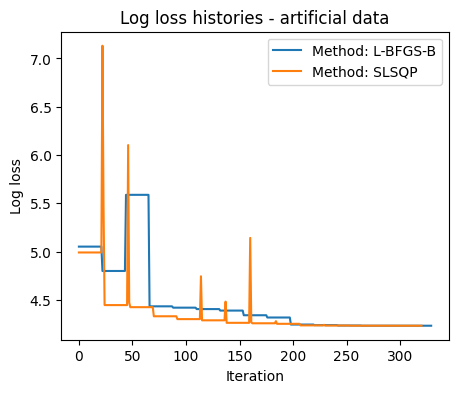

In [5]:
plot_loss_histories_one_plot_log(loss_histories, dataset='artificial data')

## UCI Dataset

### Breast Cancer Wisconsin Diagnostic

In [6]:
X_BC, y_BC = get_dataset(17, 'M', 'B')

In [7]:
_, loss_histories, optimal_params = run_experiment(X_BC, y_BC, iter_=1, options_=options)
pd.DataFrame(optimal_params)

/Users/zosia/Desktop/Optimization-in-Data-Analysis/model.py:27: RuntimeWarning: overflow encountered in exp
  loss = self.C * np.mean(np.log(1 + np.exp(-y * (np.dot(X, n - p) + b)))) + np.sum(n + p)


,L-BFGS-B,SLSQP
Optimal n,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.3268216820317216e-13, 2.5104732405102234e-1..."
Optimal p,"[0.0, 0.1937556079039344, 0.0, 0.0, 0.0, 0.0, ...","[1.4155628289089864e-13, 0.21037946923665624, ..."
Optimal w,"[0.0, -0.1937556079039344, 0.0, 0.0, 0.0, 0.0,...","[-8.874114687726484e-15, -0.2103794692364052, ..."
Optimal b,0.560896,0.569676
Minimum loss,15.648926,15.628018


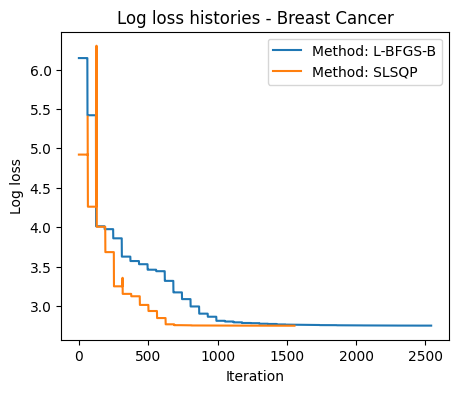

In [8]:
plot_loss_histories_one_plot_log(loss_histories, dataset= "Breast Cancer")

### Banknote Authentication

In [9]:
X_BA, y_BA = get_dataset(267, 0, 1)

In [10]:
_, loss_histories, optimal_params = run_experiment(X_BA, y_BA, iter_=1, options_=options)
pd.DataFrame(optimal_params)

,L-BFGS-B,SLSQP
Optimal n,"[0.0, 0.0, 0.0, 0.0]","[2.6974428357585015e-14, 2.125135893772596e-14..."
Optimal p,"[3.4873102261348947, 3.4953713025829978, 3.005...","[3.469976449269787, 3.4791255907791525, 2.9930..."
Optimal w,"[-3.4873102261348947, -3.4953713025829978, -3....","[-3.46997644926976, -3.479125590779131, -2.993..."
Optimal b,-0.93894,-0.920647
Minimum loss,17.32303,17.322578


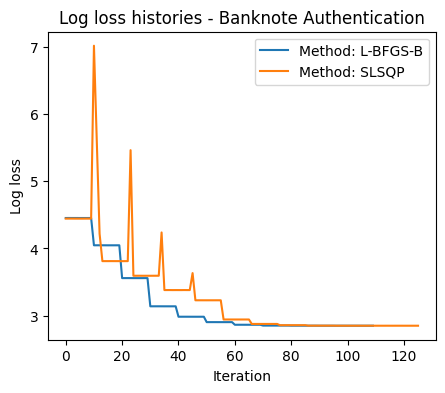

In [11]:
plot_loss_histories_one_plot_log(loss_histories, dataset="Banknote Authentication")

### Spambase

In [12]:
X_S, y_S = get_dataset(94, 0, 1)

In [13]:
_, loss_histories, optimal_params = run_experiment(X_S, y_S, iter_=1, options_=options)
pd.DataFrame(optimal_params)

,L-BFGS-B,SLSQP
Optimal n,"[0.0, 0.0, 0.067212838929857, 0.04333748151263...","[9.616930281555102e-14, 1.1037656383695182e-13..."
Optimal p,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[5.890521570368113e-14, 1.8814906893279982e-14..."
Optimal w,"[0.0, 0.0, 0.067212838929857, 0.04333748151263...","[3.726408711186989e-14, 9.156165694367184e-14,..."
Optimal b,-0.616417,-0.613785
Minimum loss,35.834084,35.831848


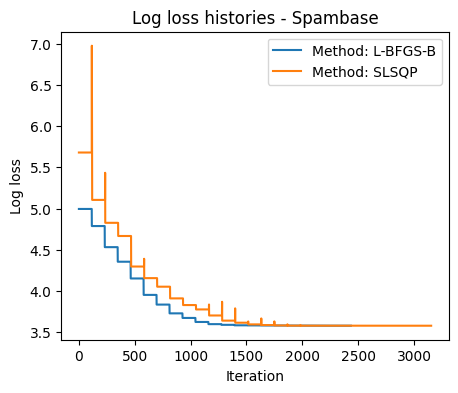

In [14]:
plot_loss_histories_one_plot_log(loss_histories, dataset="Spambase")

### Compare the methods

In [19]:
accuracies_breast_cancer, loss_histories_breast_cancer, optimal_params_breast_cancer = run_experiment(X_BC, y_BC, options_=options)
accuracies_banknote, loss_histories_banknote, optimal_params_banknote = run_experiment(X_BA, y_BA, options_=options)
accuracies_spambase, loss_histories_spambase, optimal_params_spambase = run_experiment(X_S, y_S, options_=options)

/Users/zosia/Desktop/Optimization-in-Data-Analysis/model.py:27: RuntimeWarning: overflow encountered in exp
  loss = self.C * np.mean(np.log(1 + np.exp(-y * (np.dot(X, n - p) + b)))) + np.sum(n + p)
/Users/zosia/Desktop/Optimization-in-Data-Analysis/model.py:27: RuntimeWarning: overflow encountered in exp
  loss = self.C * np.mean(np.log(1 + np.exp(-y * (np.dot(X, n - p) + b)))) + np.sum(n + p)
/Users/zosia/Desktop/Optimization-in-Data-Analysis/model.py:27: RuntimeWarning: overflow encountered in exp
  loss = self.C * np.mean(np.log(1 + np.exp(-y * (np.dot(X, n - p) + b)))) + np.sum(n + p)
/Users/zosia/Desktop/Optimization-in-Data-Analysis/model.py:27: RuntimeWarning: overflow encountered in exp
  loss = self.C * np.mean(np.log(1 + np.exp(-y * (np.dot(X, n - p) + b)))) + np.sum(n + p)


In [20]:
all_accuracies = {
    'Breast Cancer': accuracies_breast_cancer,
    'Banknote': accuracies_banknote,
    'Spambase': accuracies_spambase
}

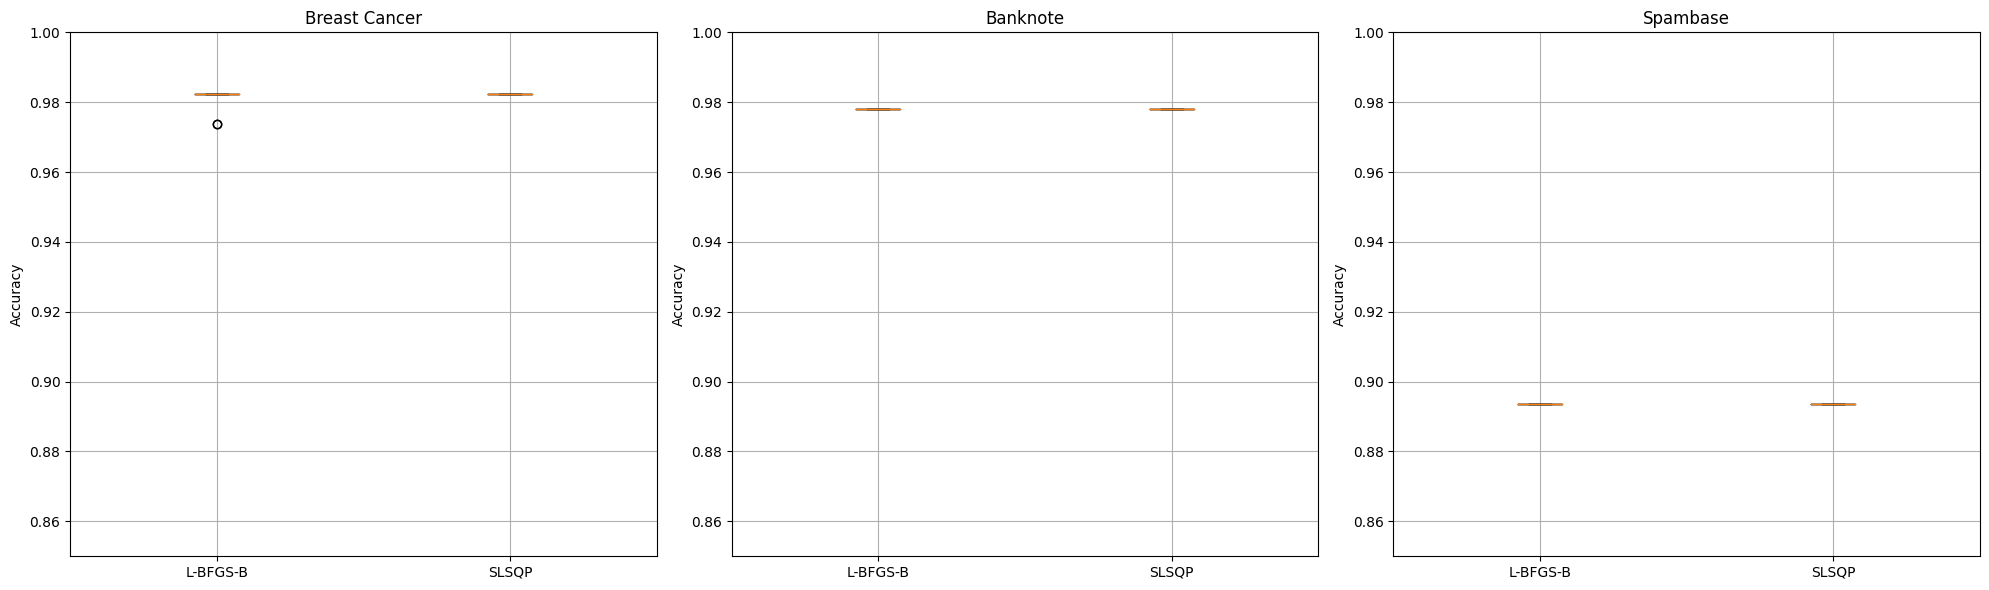

In [21]:
plot_accuracies(all_accuracies)

### Fine-tuning the parameters - Banknote Authentication

In [22]:
params = {
    'L-BFGS-B': {
        'maxiter': [10, 20, 50, 100, 150, 200, 300, 400, 500],
        'ftol': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 3e-5, 6e-5, 1e-4],
        'eps': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1.0]
    },
    'SLSQP': {
        'maxiter': [10, 20, 50, 100, 150, 200, 300, 400, 500],
        'ftol': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 3e-5, 6e-5, 1e-4],
        'eps': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1.0]
    }
}

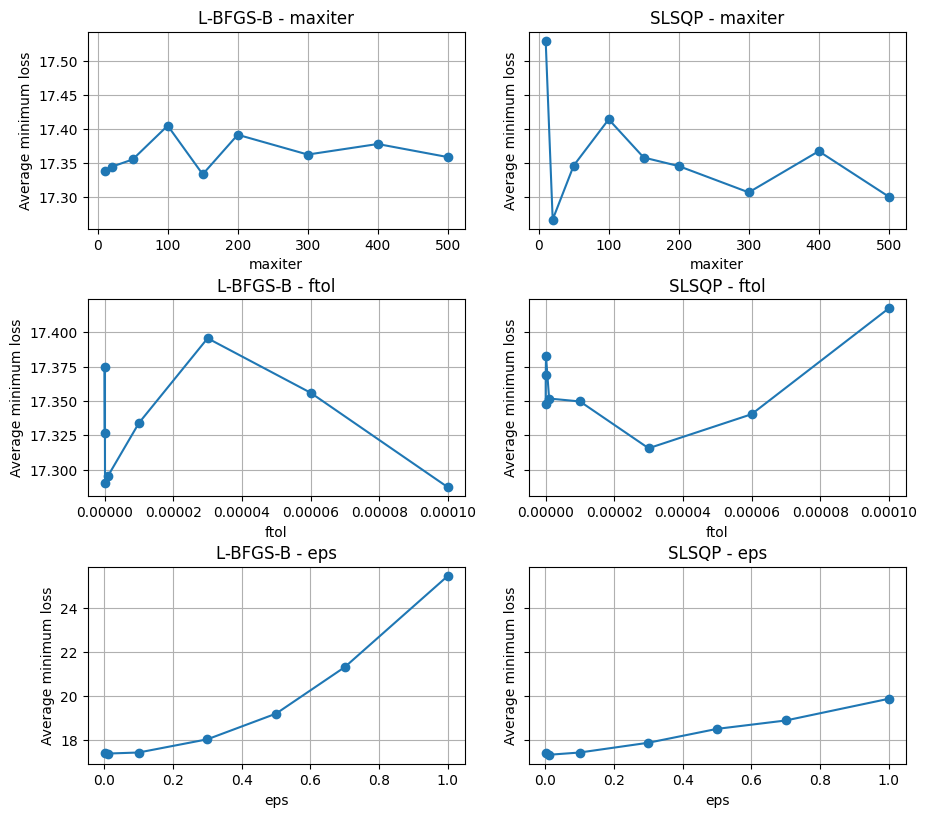

In [23]:
test_and_plot_parameters(X_BA, y_BA, params, iter_=50)